<a href="https://colab.research.google.com/github/Vlasovasona/Python-and-ML-Raschka/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BD%D0%B5%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация методом k-средних с использованием scikit-learn


---



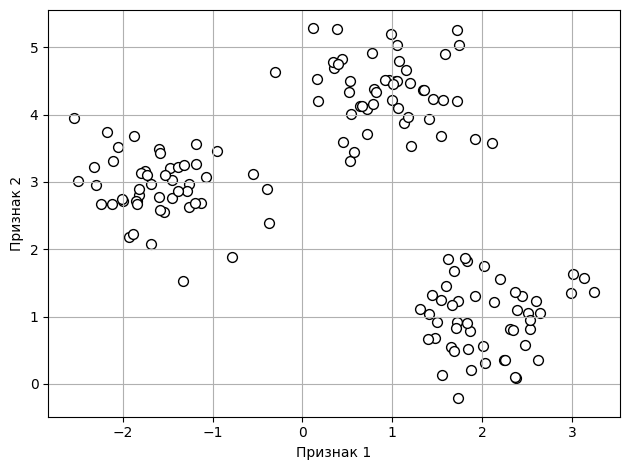

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()
plt.tight_layout()
plt.show()

Алгоритм k-средних:
1. Случайным образом выбрать k центроидов из примеров в качестве начальных центров кластеров.

2. Сопоставить каждый экземпляр с ближайшим центроидом.

3. Переместить центроиды в центр группы экземпляров, которыебыли ему присвоены.

4. Повторять шаги 2 и 3 до тех пор, пока состав кластеров не перестанет изменяться или не будет достигнут заданный пользователем допуск или максимальное количество итераций.

Измерение сходства между объектами измеряется так:

$$ d(x, y)^2 = \sum_{j=1}^{m} (x_j - y_j)^2 = ||x - y||^2_2$$

Основываясь на этой метрике мы можем описать алгоритм k-средних как просту задачу оптимизации - итеративный подход к минимизации внутрикластерной суммы квадратичных ошибок (SSE), которую иногда также называют *инерцией кластера*.



In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10, # выполнение 10 независимых запусков алгоритма со случ. центроидами
            max_iter=300, # макс кол-во итераций для каждого запуска
            tol=0.0001, # допуск манимальных внутриклассовых изменений для сходимости
            random_state=0)
y_km = km.fit_predict(X)

**При использовании k-means необходимо убедиться, что используются отмасштабированные данные!**

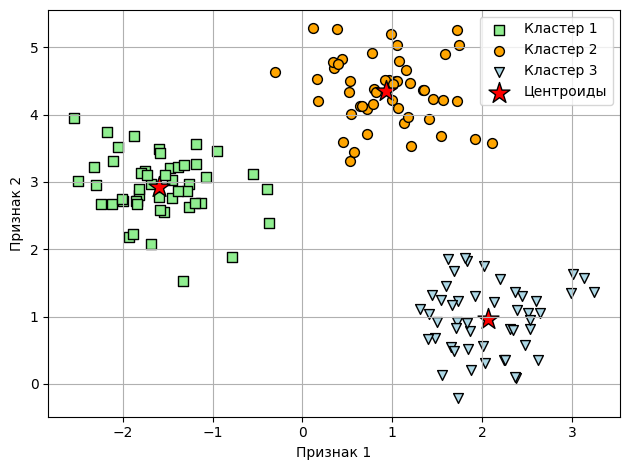

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s',
            edgecolors='black',
            label='Кластер 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o',
            edgecolors='black',
            label='Кластер 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v',
            edgecolors='black',
            label='Кластер 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red',
            edgecolors='black',
            label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Более разумный способ размещения начальных центроидов: алгоритм k-средних++


---



Инициализация в алгоритме k-средних:

1. Инициализируем пустое множество M для хранения k выбранных центроидов.

2. Случайным образом выбираем первый центроид из входных данных и сохраняем его в M.

3. для каждой точки данных $x^{(i)}$, не входящей в М, находим минимальный квадрат расстояния $d(x^{(i)}, M)^2$ до любого из центроидов в М.

4. Чтобы случайным образом выбрать следующий центроид, используюем взвешенное распределение вероятностей. Например, можно собрать все точки в массив и построить взвешенную случайную выборку таким образом, что чем больше квадрат расстояния, тем больше вероятность того, что точка станет следующим центроидом.

5. Повторяем шаги 3 и 4, пока не будут выбраны k центроидов.

6. Запускаем классический алгоритм k-средних.

Чтобы использовать этот алгоритм достаточно установить параметр init='k-means++' (стоит по умолчанию).

# Использование метода локтя для нахождения оптимального кол-во кластеров.


---



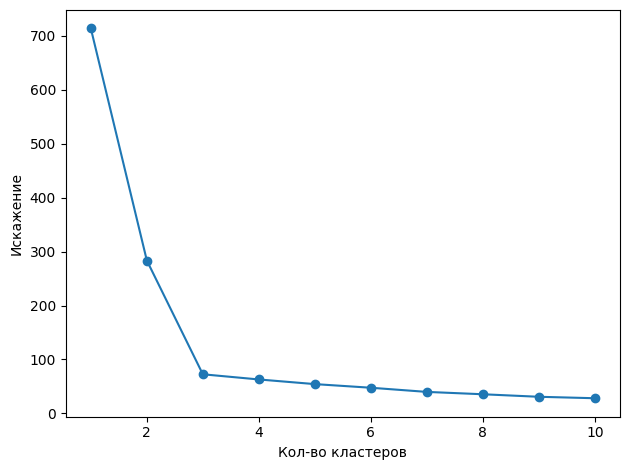

In [5]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(X)
  distortions.append(km.inertia_) # вычисление внутрикластерного искажения

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Искажение')
plt.tight_layout()
plt.show()

Как можно увидеть, локоть образуется при k = 3. Отсюда следует, что оптимальное k = 3.

# Организация кластеров в виде иерархического дерева.


---



Двумя основными подходами к иерархической кластеризации являются агломеративная и дивизивная иерархическая кластеризация. В дивизивной мы начинаем с одного кластера, который включает в себя полный набор данных, и итеративно разделяем этот кластер на более мелкие кластеры, пока каждый кластер не будет содержать только одну точку данных.

Агломеративная кластеризация использует противоположный подход: мы начинаем с каждой точки как отдельного кластера и объединяем ближайшие пары кластеров, пока не останется только один кластер.


Двумя стандартными алгоритмами агломеративной иерархической кластеризации являются подходы: метод одиночной связи и полной связи. Используя алгоритм одиночной связи, мы вычисляем расстояния между наиболее похожими элементами для каждой пары кластеров и объединяем два кластера, для которых расстояние между наиболее похожими эелментами наименьшее. Алгоритм полной связи вместо сравнения наиболее похожих элементов в каждой паре кластеров сравнивает наиболее непохожие.

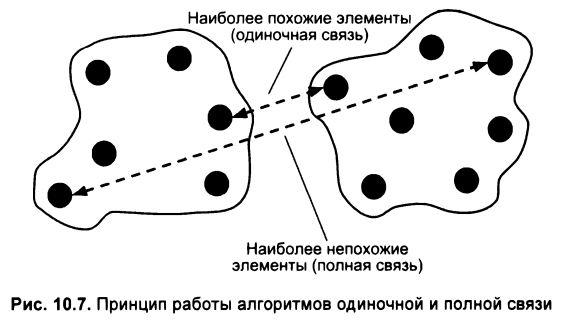

Алгоритм агломеративной кластеризации с сипользованием алгоритма полной связи:

1. Вычислить попарную матрицу расстояний всех точек.

2. Представить каждую точку данных в виде одноэлементного кластера.

3. Объединить два ближайших кластера на основе расстояния между самыми непохожими (отдаленными элементами).

3. Обновить матрицу связи кластера.

4. Повторить шаги 2-4, пока не останется единственный кластер.

In [6]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [7]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist # полученная матрица расстояний

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [10]:
from scipy.cluster.hierarchy import linkage

# можно либо использовать сжатую матрицу расстояний (pdist)
row_clusters = linkage(pdist(df, metric='euclidean'),
                       method='complete')

row_clusters = linkage(df.values,  # либо использовать полную входную матрицу объектов
                       method='complete',
                       metric='euclidean')

In [11]:
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=[f'cluster {(i+1)}' for i in
                    range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


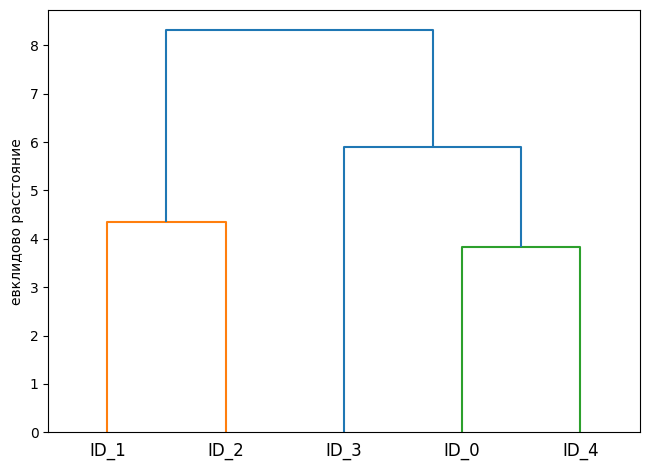

In [12]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(
    row_clusters,
    labels=labels
)
plt.tight_layout()
plt.ylabel('евклидово расстояние')
plt.show()

Эта дендрограмма отображает в общем виде различные кластеры, образовавшиеся в ходе агломеративной иерархической кластеризации. Например, ID_0 и ID_4, за которыми следуют ID_1 и ID_2, являются наиболее похожими на основе метрики евклидова расстояния.

Процедура прикрепления дендрограммы к тепловой карте:

1. Создаем новый объект figure и определяем положение по оси x, положение по оси y, ширину и высоту дендрограммы с помощью атрибута add_axes. Кроме того, поворачиваем дендрограмму на 90 градусов против часовой стрелки.

2. Затем переупорядочиваем данные в нашем исходном DataFrame в соответствии с метриками кластеризации, доступными из объекта dendrogram, который по сути является словарем Python, с ключом leaves.

3. Далее создается тепловая карта из переупорядоченного DataFrame и размещается рядом с дендрограммой.

4. Изменяем внешний вид дендрограммы, удалив оси и скрыв их деления. Кроме того, добавляем цветную линейку и назначаем имена признаков и записей данных меткам осей x и y соответственно.

/tmp/ipython-input-16-854756313.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipython-input-16-854756313.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


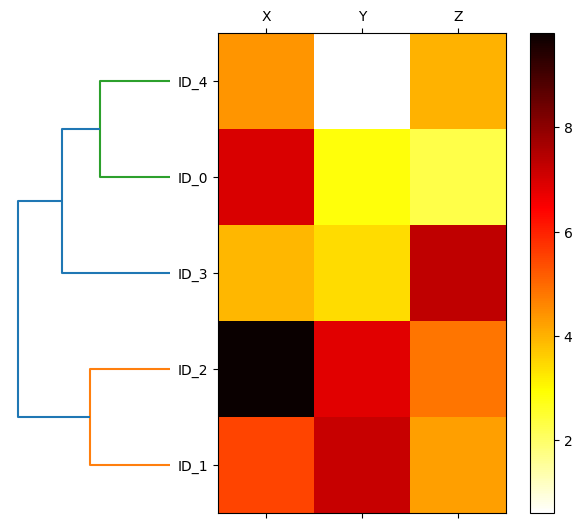

In [16]:
# шаг 1
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
                       orientation='left')

# шаг 2
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# шаг 3
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r')

# шаг 4
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
  i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Метки кластеров: {labels}')

Метки кластеров: [1 0 0 2 1]


In [19]:
ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Метки кластеров: {labels}')

Метки кластеров: [0 1 1 0 0]


# Обнаружение областей высокой плотности с помощью DBSCAN


---



Кластеризация на основе плотности присваивает метки кластерам, исходя из плотных областей точек. В DBSCAN понятие плотности определяется как количество точек в пределах заданного радиуса.

В соответствии с алгоритмом, каждому примеру присваивается специальная метка по следующим критериям:

1. Точка считается *окруженной*, если хотя бы определенное кол-во соседних точек (MinPts) попадает в указанных радиус.

2. *Граничная* точка - это точка, которая имеет меньше соседей, чем MinPts в пределах радиуса, но находится в пределах радиуса относительно центральное точки.

3. Все другие точки, которые не являются ни окруженными, ни граничными, считаются *шумовыми* точками.

После классификации точек как окруженных, граничных и шумовых, алгоритм DBSCAN сводится к двум простым шагам:

1. Сформировать отдельный кластер для каждой окруженной точки или связанной группы окруженных точек (Окруженные точки связаны, если они отстоят друг от друга не меньше чем на величину радиуса).

2. Названчить каждую граничную точку кластеру соответствующей окруженной точки.

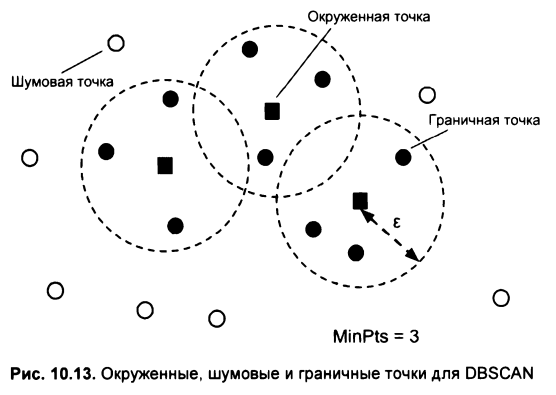

Одним из основных преимуществ использования DBSCAN является то, что он не предполагает сферическую форму кластеров, как метод k-средних. Кроме того, DBSCAN отличается от k-средних и иерархической кластеризации тем, что не обязательно назначает каждую точку кластеру, и благодаря этому может удалять шумовые точки.

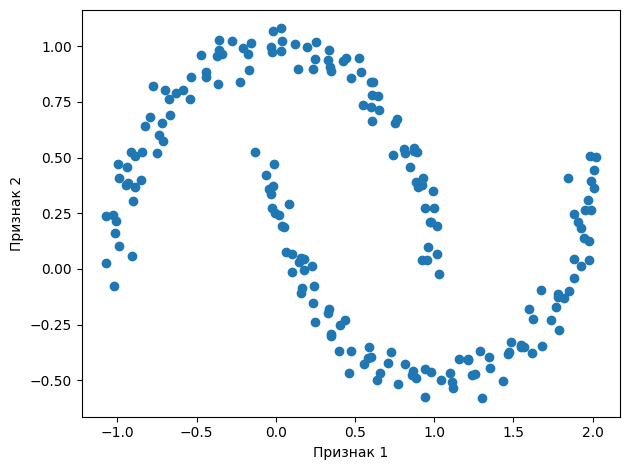

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.tight_layout()
plt.show()

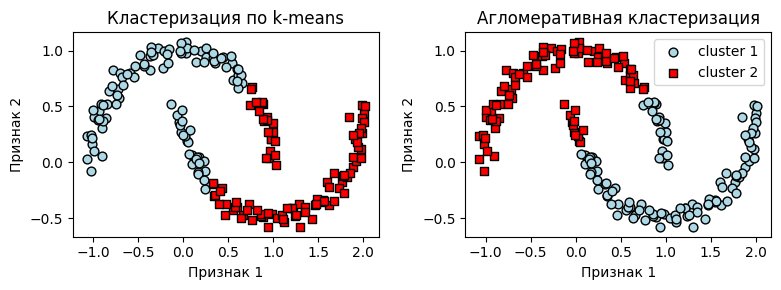

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightblue',
            edgecolors='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='red',
            edgecolors='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('Кластеризация по k-means')
ax1.set_xlabel('Признак 1')
ax1.set_ylabel('Признак 2')

ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolors='black',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolors='black',
            marker='s',
            s=40,
            label='cluster 2')
ax2.set_title('Агломеративная кластеризация')
ax2.set_xlabel('Признак 1')
ax2.set_ylabel('Признак 2')

plt.legend()
plt.tight_layout()
plt.show()

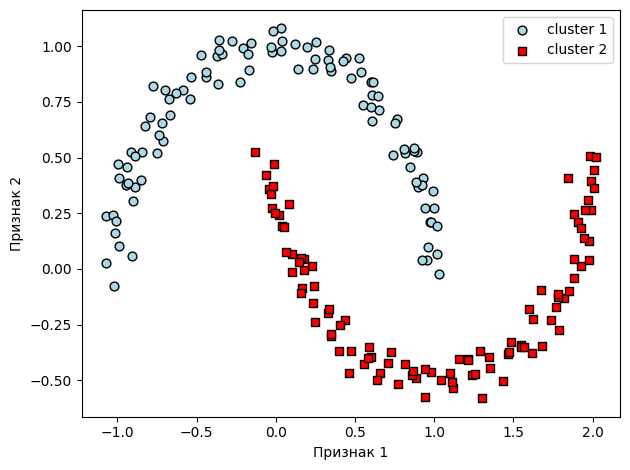

In [27]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolors='black',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolors='black',
            marker='s',
            s=40,
            label='cluster 2')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.legend()
plt.tight_layout()
plt.show()